In [20]:
import pandas as pd
import seaborn as sns
import numpy as np

# Importando o Dataset a ser usado para a criação do modelo

In [3]:
df = pd.read_csv('Aluguel_apartamentos_RJ.csv')
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,NaN
2,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
3,Cachambi,2,0,0,50,1300.0,301.0,17.0
4,Centro,1,0,0,36,1200.0,NaN,NaN


Reorganizando os dados

In [4]:
df = df[['Valor', 'Area', 'Suites', 'Vagas', 'Quartos', 'Condominio', 'IPTU', 'Bairro']]
df

,Valor,Area,Suites,Vagas,Quartos,Condominio,IPTU,Bairro
0,800.0,15,0,0,1,390.0,20.0,Centro
1,800.0,48,0,0,1,230.0,NaN,Higienópolis
2,1200.0,70,0,1,3,NaN,NaN,Vista Alegre
3,1300.0,50,0,0,2,301.0,17.0,Cachambi
4,1200.0,36,0,0,1,NaN,NaN,Centro
...,...,...,...,...,...,...,...,...
19527,1000.0,52,0,0,2,550.0,NaN,Vila Valqueire
19528,900.0,70,0,0,2,490.0,48.0,Méier
19529,1800.0,78,2,1,3,800.0,40.0,Jacarepaguá
19530,1400.0,48,0,1,2,509.0,37.0,São Francisco Xavier


In [7]:
df.describe().round(2)

,Valor,Area,Suites,Vagas,Quartos,Condominio,IPTU
count,19525.00,19532.00,19532.00,19532.00,19532.00,18787.00,14060.00
mean,4744.61,119.79,0.88,1.23,2.48,1722.65,686.17
std,34258.42,92.62,0.98,14.05,0.96,47974.63,4505.79
min,100.00,10.00,0.00,0.00,0.00,1.00,1.00
25%,1600.00,66.00,0.00,0.00,2.00,600.00,100.00
50%,2700.00,90.00,1.00,1.00,2.00,976.00,219.00
75%,5000.00,140.00,1.00,2.00,3.00,1621.00,500.00
max,4500000.00,1200.00,7.00,1960.00,32.00,6552570.00,450625.00


Listando apartamentos com aluguel acima de R$30k

In [12]:
df.query('Valor > 30000').sort_values(by='Valor')


,Valor,Area,Suites,Vagas,Quartos,Condominio,IPTU,Bairro
17472,30100.0,340,4,2,4,5708.0,18700.0,Ipanema
14925,31000.0,380,2,2,4,3200.0,NaN,Leblon
976,31000.0,310,4,3,4,6070.0,NaN,Ipanema
5621,32000.0,650,1,2,5,5200.0,2000.0,Copacabana
4030,33000.0,400,4,4,4,4822.0,3022.0,São Conrado
...,...,...,...,...,...,...,...,...
19166,160000.0,403,4,3,4,3714.0,2000.0,Barra da Tijuca
11362,550000.0,150,1,2,2,850.0,150.0,Freguesia (Jacarepaguá)
6850,600000.0,65,0,1,1,980.0,120.0,Barra da Tijuca
12423,1250000.0,167,1,2,3,1186.0,320.0,Recreio dos Bandeirantes


## Retirando os apartamentos que possuem um aluguel maior que 30k

In [14]:
df = df.query('Valor <= 30000')
df

,Valor,Area,Suites,Vagas,Quartos,Condominio,IPTU,Bairro
0,800.0,15,0,0,1,390.0,20.0,Centro
1,800.0,48,0,0,1,230.0,NaN,Higienópolis
2,1200.0,70,0,1,3,NaN,NaN,Vista Alegre
3,1300.0,50,0,0,2,301.0,17.0,Cachambi
4,1200.0,36,0,0,1,NaN,NaN,Centro
...,...,...,...,...,...,...,...,...
19527,1000.0,52,0,0,2,550.0,NaN,Vila Valqueire
19528,900.0,70,0,0,2,490.0,48.0,Méier
19529,1800.0,78,2,1,3,800.0,40.0,Jacarepaguá
19530,1400.0,48,0,1,2,509.0,37.0,São Francisco Xavier


### Plotando um Boxplot dos dados 

Boxplot ajuda a entender a distribuição dos valores.

<AxesSubplot:title={'center':'Valor Apartamentos'}, xlabel='R$'>

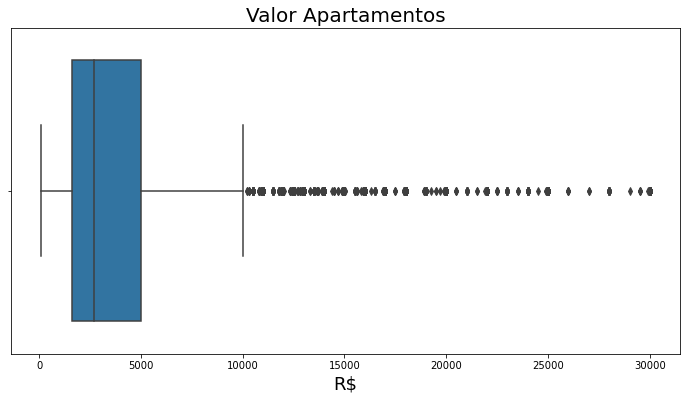

In [17]:
ax = sns.boxplot(data=df, orient='h', x='Valor')
ax.figure.set_size_inches(12,6)
ax.set_title('Valor Apartamentos', fontsize = 20)
ax.set_xlabel('R$', fontsize = 18)
ax

**Interpretando os valores do gráfico**

Nota-se que a mediana dos valores de aluguel está um pouco acima de R$2500.
O gráfico também indica que valores acima de 10k podem ser possíveis outliers, porém não para este modelo. Como trata-se de alugueis no Rio de Janeiro, é bem comum achar valores altos. 

Como a distribuição dos dados não está no formato de uma distribuição normalizada, será necessário fazer um ajuste nos dados. Porém somente nos numéricos. 

_________________________________________________________________________________________________________

## Criando uma distribuição normal dos dados

In [27]:
df_normal = pd.DataFrame()

df_normal['log_Valor'] = np.log(df.Valor)
df_normal['log_Area'] = np.log(df.Area)
df_normal['log_Quartos'] = np.log(df['Quartos'] +1 )
df_normal['log_Vagas'] = np.log(df['Vagas'] +1 )# soma-se 1 para que o valor do log n dê -infinito
df_normal['log_Suites'] = np.log(df['Suites'] +1 )
df_normal['log_Condominio'] = np.log(df['Condominio'] +1 )
df_normal['log_IPTU'] = np.log(df['IPTU'] +1 )
df_normal['Bairro'] = df.Bairro


In [28]:
df_normal

,log_Valor,log_Area,log_Quartos,log_Vagas,log_Suites,log_Condominio,log_IPTU,Bairro
0,6.684612,2.708050,0.693147,0.000000,0.000000,5.968708,3.044522,Centro
1,6.684612,3.871201,0.693147,0.000000,0.000000,5.442418,NaN,Higienópolis
2,7.090077,4.248495,1.386294,0.693147,0.000000,NaN,NaN,Vista Alegre
3,7.170120,3.912023,1.098612,0.000000,0.000000,5.710427,2.890372,Cachambi
4,7.090077,3.583519,0.693147,0.000000,0.000000,NaN,NaN,Centro
...,...,...,...,...,...,...,...,...
19527,6.907755,3.951244,1.098612,0.000000,0.000000,6.311735,NaN,Vila Valqueire
19528,6.802395,4.248495,1.098612,0.000000,0.000000,6.196444,3.891820,Méier
19529,7.495542,4.356709,1.386294,0.693147,1.098612,6.685861,3.713572,Jacarepaguá
19530,7.244228,3.871201,1.098612,0.693147,0.000000,6.234411,3.637586,São Francisco Xavier


### Exportando nosso dataset finalizado 

In [29]:
df_normal.to_csv('dataset.csv', index=False)

In [30]:
df_normal.Bairro

0                      Centro
1                Higienópolis
2                Vista Alegre
3                    Cachambi
4                      Centro
                 ...         
19527          Vila Valqueire
19528                   Méier
19529             Jacarepaguá
19530    São Francisco Xavier
19531                  Leblon
Name: Bairro, Length: 19463, dtype: object